In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../GitHub/statistic/Mann-Kendall/data.csv')

In [3]:
# -*- coding: utf-8 -*-

from __future__ import division
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm

def mk_test(x, alpha=0.05):
    """
    This function is derived from code originally posted by Sat Kumar Tomer
    (satkumartomer@gmail.com)
    See also: http://vsp.pnnl.gov/help/Vsample/Design_Trend_Mann_Kendall.htm
    The purpose of the Mann-Kendall (MK) test (Mann 1945, Kendall 1975, Gilbert
    1987) is to statistically assess if there is a monotonic upward or downward
    trend of the variable of interest over time. A monotonic upward (downward)
    trend means that the variable consistently increases (decreases) through
    time, but the trend may or may not be linear. The MK test can be used in
    place of a parametric linear regression analysis, which can be used to test
    if the slope of the estimated linear regression line is different from
    zero. The regression analysis requires that the residuals from the fitted
    regression line be normally distributed; an assumption not required by the
    MK test, that is, the MK test is a non-parametric (distribution-free) test.
    Hirsch, Slack and Smith (1982, page 107) indicate that the MK test is best
    viewed as an exploratory analysis and is most appropriately used to
    identify stations where changes are significant or of large magnitude and
    to quantify these findings.
    Input:
        x:   a vector of data
        alpha: significance level (0.05 default)
    Output:
        trend: tells the trend (increasing, decreasing or no trend)
        h: True (if trend is present) or False (if trend is absence)
        p: p value of the significance test
        z: normalized test statistics
    Examples
    --------
      >>> x = np.random.rand(100)
      >>> trend,h,p,z = mk_test(x,0.05)
    """
    n = len(x)
    # calculate S
    s = 0
    for k in range(n - 1):
        for j in range(k + 1, n):
            s += np.sign(x[j] - x[k])

    # calculate the unique data
    unique_x, tp = np.unique(x, return_counts=True)
    g = len(unique_x)

    # calculate the var(s)
    if n == g:  # there is no tie
        var_s = (n * (n - 1) * (2 * n + 5)) / 18
    else:  # there are some ties in data
        var_s = (n * (n - 1) * (2 * n + 5) - np.sum(tp * (tp - 1) * (2 * tp + 5))) / 18

    if s > 0:
        z = (s - 1) / np.sqrt(var_s)
    elif s < 0:
        z = (s + 1) / np.sqrt(var_s)
    else:  # s == 0:
        z = 0

    # calculate the p_value
    p = 2 * (1 - norm.cdf(abs(z)))  # two tail test
    h = abs(z) > norm.ppf(1 - alpha / 2)

    if (z < 0) and h:
        trend = 'decreasing'
    elif (z > 0) and h:
        trend = 'increasing'
    else:
        trend = 'no trend'

    return trend, h, p, z



trend1, h1, p1, z1 = mk_test(df['data'])

In [4]:
import seaborn as sns
import pymannkendall as mk

In [5]:
result = mk.original_test(df['data'], alpha=0.05)
result

Mann_Kendall_Test(trend='increasing', h=True, p=0.03185158292915902, z=2.146268252919038, Tau=0.23717948717948717, s=185.0, var_s=7349.666666666667, slope=0.41935483870967744, intercept=11.82258064516129)

(0.0, 80.0)

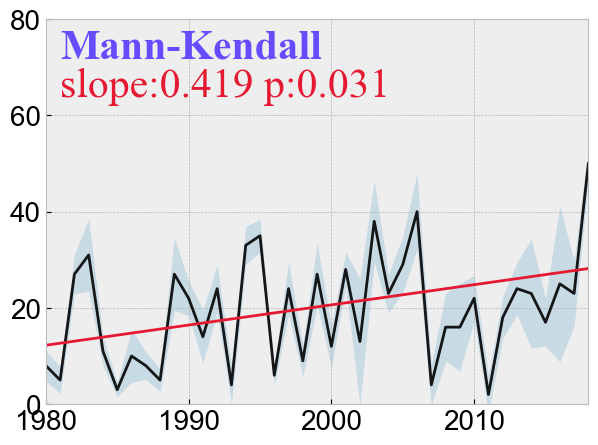

In [6]:
import matplotlib.pyplot as plt
import cmaps
palette = cmaps.Cat12_r
plt.style.use('bmh')
plt.figure(figsize=(7, 5))
plt.plot(df['x'], df['data'], marker='', color='black', linewidth=2, alpha=0.9)
a = result[7]; b = result[8]; p = result[2]
y1 = a * (df['x'].values - 1979) + b
plt.plot(df['x'], y1, lw=2, color=palette(0)) 
plt.fill_between(df['x'], df['data'] - df['std'], df['data'] + df['std'], alpha=.2, linewidth=0)
plt.tick_params(labelsize=20)
sns.set_theme(font='Times New Roman')
plt.text(1981, 80*9/10, 'Mann-Kendall', fontweight='heavy', color=palette(2), fontsize=30)
plt.text(1981, 80*8/10, 'slope:'+str(a)[0:5]+' p:'+str(p)[0:5], color=palette(0), fontsize=30)
plt.xlim(1980, 2018)
plt.ylim(0, 80)